# Star catalogue analysis

Thanks to UCF Physics undergrad Tyler Townsend for contributing to the development of this notebook.

In [1]:
# Import modules that contain functions we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Getting the data

In [2]:
# Read in data that will be used for the calculations.
# Using pandas read_csv method, we can create a data frame
data = pd.read_csv("https://github.com/adamlamee/CODINGinK12-data/raw/master/stars.csv")

In [3]:
# We wish too look at the first 5 rows of our data set
data.head(5)

,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
0,Sol,0.000000,0.000000,0.0000,-26.70,4.850,0.656,5756.588113,0.000005,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN
1,Proxima Centauri,14.495985,-62.679485,1.2959,11.01,15.447,1.807,3383.441193,-0.472264,-0.361451,-1.151219,Cen,0.000058,V645,11.079,10.939
2,Rigil Kentaurus,14.660765,-60.833976,1.3248,-0.01,4.379,0.710,5567.728737,-0.495203,-0.414084,-1.156625,Cen,1.543121,NaN,0.113,-0.087
3,NaN,14.660346,-60.838300,1.3248,1.35,5.739,0.900,4996.415833,-0.495181,-0.413973,-1.156674,Cen,0.440961,NaN,NaN,NaN
4,Barnard's Star,17.963472,4.693388,1.8238,9.54,13.235,1.570,3691.168543,-0.017373,-1.816613,0.149123,Oph,0.000443,V2500,9.590,9.490


## Star map

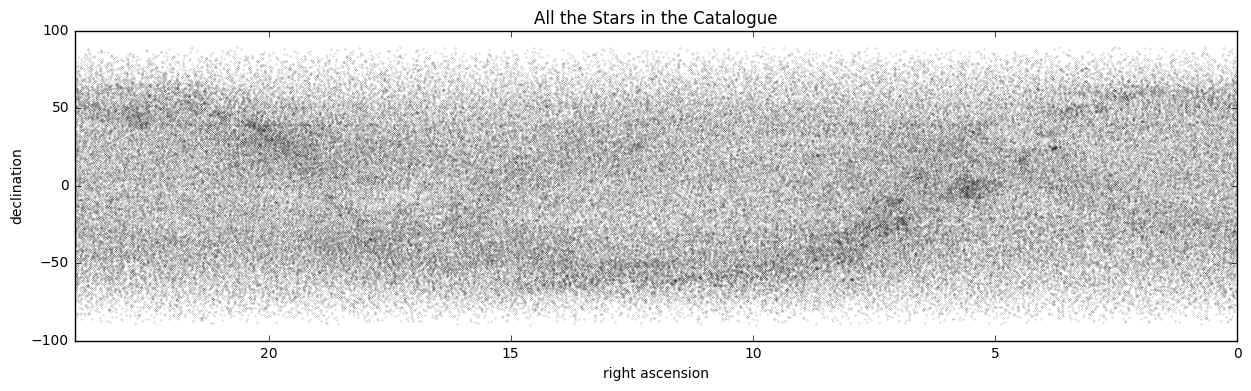

In [4]:
fig = plt.figure(figsize=(15, 4))
plt.scatter(data.ra,data.dec, s=0.01)
plt.xlim(24, 0)
plt.title("All the Stars in the Catalogue")
plt.xlabel('right ascension')
plt.ylabel('declination')

## Does hotter mean brighter?

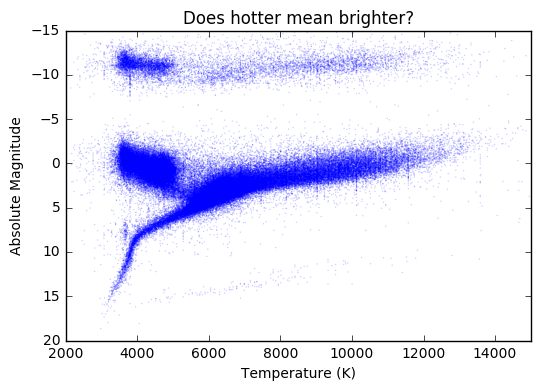

In [5]:
# This is similar to an H-R diagram,
#but with the more intuitive "temperature" instead of "spectral type"

# format the points on the graph
transparency = 0.2
size = 1

# draws a scatter plot
plt.scatter(data.temp, data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(2000,15000)
plt.ylim(20,-15)
plt.title("Does hotter mean brighter?")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Temperature (K)")

## Choose a constellation to examine

In [6]:
# These are the abbreviations for all the constellations
data.sort_values('con').con.unique()

array(['And', 'Ant', 'Aps', 'Aql', 'Aqr', 'Ara', 'Ari', 'Aur', 'Boo',
       'CMa', 'CMi', 'CVn', 'Cae', 'Cam', 'Cap', 'Car', 'Cas', 'Cen',
       'Cep', 'Cet', 'Cha', 'Cir', 'Cnc', 'Col', 'Com', 'CrA', 'CrB',
       'Crt', 'Cru', 'Crv', 'Cyg', 'Del', 'Dor', 'Dra', 'Equ', 'Eri',
       'For', 'Gem', 'Gru', 'Her', 'Hor', 'Hya', 'Hyi', 'Ind', 'LMi',
       'Lac', 'Leo', 'Lep', 'Lib', 'Lup', 'Lyn', 'Lyr', 'Men', 'Mic',
       'Mon', 'Mus', 'Nor', 'Oct', 'Oph', 'Ori', 'Pav', 'Peg', 'Per',
       'Phe', 'Pic', 'PsA', 'Psc', 'Pup', 'Pyx', 'Ret', 'Scl', 'Sco',
       'Sct', 'Ser', 'Sex', 'Sge', 'Sgr', 'Tau', 'Tel', 'TrA', 'Tri',
       'Tuc', 'UMa', 'UMi', 'Vel', 'Vir', 'Vol', 'Vul', nan], dtype=object)

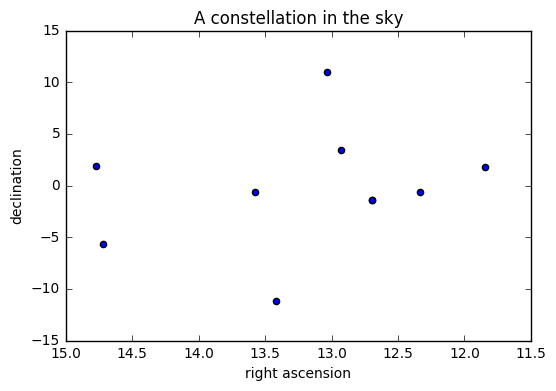

In [7]:
# This shows just one constellation
data_con = data.query('con == "Vir"')

# This plots where the brightest 10 stars are in the sky
data_con = data_con.sort_values('mag').head(10)
plt.scatter(data_con.ra,data_con.dec)
plt.gca().invert_xaxis()
plt.title("A constellation in the sky")
plt.xlabel('right ascension')
plt.ylabel('declination')

### Which types of stars make up your constellation?

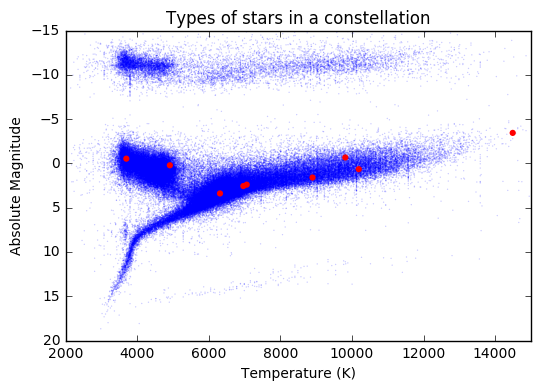

In [8]:
# format the points on the graph
transparency = 0.2
size = 1

# draws a scatter plot
plt.scatter(data.temp, data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.scatter(data_con.temp, data_con.absmag, color='red', edgecolors='none')
plt.xlim(2000,15000)
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Temperature (K)")

Here's a reference image
![](https://github.com/adamlamee/CODINGinK12-data/raw/master/H-R-diagram.jpeg)

# References
- The data came from [The Astronomy Nexus](http://www.astronexus.com/hyg) and their colletion of the Hipparcos, Yale Bright Star, and Gliese catalogues ([huge zip file here](http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz)).
- Reversed H-R diagram from [The Electric Universe](http://www.holoscience.com/wp/twinkle-twinkle-electric-star/)